In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer  # THIS METHOD ONLY WORK FOR THE NUMERIC TYPE OF DATA 

In [4]:
df = pd.read_csv("./titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
 PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df.isna().sum()  # it is used to find null vaues in data

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### NULL VALUE HANDLING

Text(0.5, 1.0, 'Histogram from Dataframe')

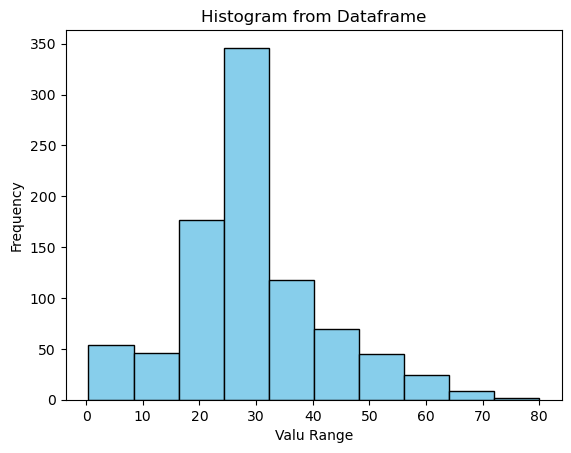

In [19]:
plt.hist(df['Age'] , bins = 10 , color ='skyblue', edgecolor = 'black')
plt.xlabel('Valu Range')
plt.ylabel('Frequency')
plt.title('Histogram from Dataframe')
# here if we executed the graph then the median is at 40 but after using fill =na it  comes to 30

In [21]:
df.fillna(df.Age.median() , inplace = True)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

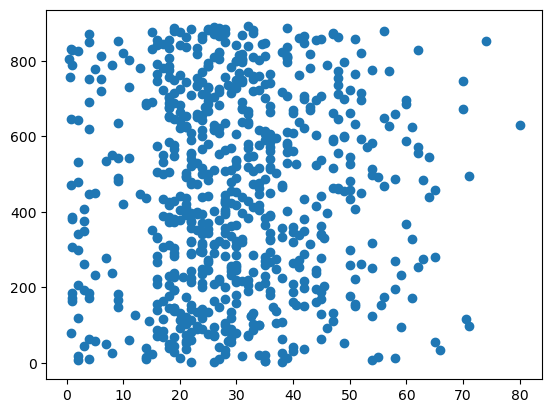

In [7]:
plt.scatter(df['Age'] , df['PassengerId'] , label = 'y1')
plt.legend


In [12]:
imputer = KNNImputer(n_neighbors = 5)

In [14]:
df_imputed = pd.DataFrame(imputer.fit_transform(df[['PassengerId', 'Survived', 'Pclass',  'Age', 'SibSp',
       'Parch', 'Fare']]) , columns = ['PassengerId', 'Survived', 'Pclass',  'Age', 'SibSp',
       'Parch', 'Fare'])  # THERE IS SOME DIFFERENCE BETWEEN FIT_TRANSFORM AND TRASFORM
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    float64
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    float64
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    float64
 5   Parch        891 non-null    float64
 6   Fare         891 non-null    float64
dtypes: float64(7)
memory usage: 48.9 KB


In [17]:
 stats = df_imputed.describe()

In [18]:
stats.index # headings of describe

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [19]:
q1 = stats['Age'].loc['25%']

In [20]:
q2 = stats['Age'].loc['50%']

In [21]:
q3 = stats['Age'].loc['75%']

In [22]:
IQR = q3 - q1
IQR

np.float64(14.75)

In [24]:
LOWER_VALUE = q1 - 1.5 * IQR
UPPER_VALUE = q3 + 1.5 * IQR
lv = LOWER_VALUE
hv = UPPER_VALUE
print(lv)
print(hv)

-0.42499999999999716
22.125


In [2]:
df = pd.read_csv("./titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
x = df[['Pclass']]
y = df[['Survived']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train , y_train)
y_pred = model.predict(x_test)
y_pred

array([[0.24966663],
       [0.43884349],
       [0.24966663],
       [0.43884349],
       [0.24966663],
       [0.62802035],
       [0.24966663],
       [0.24966663],
       [0.24966663],
       [0.62802035],
       [0.62802035],
       [0.24966663],
       [0.24966663],
       [0.24966663],
       [0.43884349],
       [0.62802035],
       [0.62802035],
       [0.24966663],
       [0.43884349],
       [0.62802035],
       [0.24966663],
       [0.62802035],
       [0.24966663],
       [0.24966663],
       [0.24966663],
       [0.24966663],
       [0.62802035],
       [0.43884349],
       [0.24966663],
       [0.24966663],
       [0.24966663],
       [0.24966663],
       [0.62802035],
       [0.24966663],
       [0.24966663],
       [0.24966663],
       [0.62802035],
       [0.24966663],
       [0.62802035],
       [0.24966663],
       [0.43884349],
       [0.24966663],
       [0.24966663],
       [0.24966663],
       [0.24966663],
       [0.24966663],
       [0.24966663],
       [0.249

In [16]:
x_train

331    1
733    2
382    3
704    3
813    3
      ..
106    3
270    1
860    3
435    1
102    1
Name: Pclass, Length: 712, dtype: int64

In [17]:
x_test

709    3
439    2
840    3
720    2
39     3
      ..
433    3
773    3
25     3
84     2
10     3
Name: Pclass, Length: 179, dtype: int64

In [18]:
y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

In [19]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

In [24]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# the value of coefficient and slope
print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])

Mean Squared Error: 0.2056434961270915
R² Score: 0.15199185850603092
Intercept: [0.81719721]
Slope: [-0.18917686]
